# Twitter Sentiment Analysis

# Importing Libraries

In [3]:
pip install NLTK

Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.3, however version 21.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Importing Dataset

In [11]:
df = pd.read_csv('Twitter Sentiments.csv')
df

,sentiment,text,user,Unnamed: 3,Unnamed: 4
0,neutral,"RT @garyhepburn: On Thursday, August 12 from 2...",tonytwirls,NaN,NaN
1,positive,RT @UoL_UGrad_LSE: The University of London of...,NitinSh73911612,NaN,NaN
2,neutral,WORK FROM HOME WILL OFTEN OUT A TURD BOWEL MOV...,fakeTakeDump,NaN,NaN
3,negative,Day 30\nIn the final course of the python trac...,steffincodes,NaN,NaN
4,neutral,RT @7Veritas4: We tried reasoning with them.\n...,SHARPIEofTheUSA,NaN,NaN
...,...,...,...,...,...
95,positive,RT @SPORTSCIRCUSINT: Udacity offers online cou...,botcybersec,NaN,NaN
96,neutral,@tamukHKN students: Faculty member Dr. Kowalsk...,tamukHKN,NaN,NaN
97,positive,Udacity offers online courses and Nanodegrees ...,SPORTSCIRCUSINT,NaN,NaN
98,neutral,"RT @BigDataGreg: Read @DBTrends article, Expan...",Fabriciosx,NaN,NaN


# Descriptive Statistics

In [13]:
df.head()

,sentiment,text,user,Unnamed: 3,Unnamed: 4
0,neutral,"RT @garyhepburn: On Thursday, August 12 from 2...",tonytwirls,NaN,NaN
1,positive,RT @UoL_UGrad_LSE: The University of London of...,NitinSh73911612,NaN,NaN
2,neutral,WORK FROM HOME WILL OFTEN OUT A TURD BOWEL MOV...,fakeTakeDump,NaN,NaN
3,negative,Day 30\nIn the final course of the python trac...,steffincodes,NaN,NaN
4,neutral,RT @7Veritas4: We tried reasoning with them.\n...,SHARPIEofTheUSA,NaN,NaN


In [85]:
df.describe()

,sentiment,text,user,Unnamed: 3,Unnamed: 4,clean_text
count,100,100,100,1,1,100
unique,3,89,93,1,1,67
top,neutral,RT @7Veritas4: We tried reasoning with them.\n...,DataScienceDojo,"scienc…""",AtuRobert,none
freq,49,4,4,1,1,23


In [86]:
df.tail()

,sentiment,text,user,Unnamed: 3,Unnamed: 4,clean_text
95,positive,RT @SPORTSCIRCUSINT: Udacity offers online cou...,botcybersec,NaN,NaN,udac offer onlin cours nanodegre subject like ...
96,neutral,@tamukHKN students: Faculty member Dr. Kowalsk...,tamukHKN,NaN,NaN,student faculti member kowalski look hire curr...
97,positive,Udacity offers online courses and Nanodegrees ...,SPORTSCIRCUSINT,NaN,NaN,none
98,neutral,"RT @BigDataGreg: Read @DBTrends article, Expan...",Fabriciosx,NaN,NaN,read dbtrend articl expand your #datasci #mach...
99,neutral,RT @PMDataScience: Do you have an idea for a d...,Fabriciosx,NaN,NaN,have idea data scienc project pmd launch open ...


In [87]:
df.shape

(100, 6)

In [88]:
df.isnull().values.any()

True

In [89]:
# Count of null values
df.isnull().sum()

sentiment      0
text           0
user           0
Unnamed: 3    99
Unnamed: 4    99
clean_text     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   100 non-null    object
 1   text        100 non-null    object
 2   user        100 non-null    object
 3   Unnamed: 3  1 non-null      object
 4   Unnamed: 4  1 non-null      object
dtypes: object(5)
memory usage: 4.0+ KB


# Data Cleaning

In [15]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
        return input_txt

In [18]:
df['clean_text']=np.vectorize(remove_pattern)(df['text'],"@[\w]*")

In [19]:
df.head()

,sentiment,text,user,Unnamed: 3,Unnamed: 4,clean_text
0,neutral,"RT @garyhepburn: On Thursday, August 12 from 2...",tonytwirls,NaN,NaN,"RT : On Thursday, August 12 from 2:00-3:00 pm,..."
1,positive,RT @UoL_UGrad_LSE: The University of London of...,NitinSh73911612,NaN,NaN,RT : The University of London offers online BS...
2,neutral,WORK FROM HOME WILL OFTEN OUT A TURD BOWEL MOV...,fakeTakeDump,NaN,NaN,None
3,negative,Day 30\nIn the final course of the python trac...,steffincodes,NaN,NaN,Day 30\nIn the final course of the python trac...
4,neutral,RT @7Veritas4: We tried reasoning with them.\n...,SHARPIEofTheUSA,NaN,NaN,RT : We tried reasoning with them.\n\nWe tried...


In [20]:
df['clean_text']=df['clean_text'].str.replace("[^a-zA-Z#]", " ")
df.head()

,sentiment,text,user,Unnamed: 3,Unnamed: 4,clean_text
0,neutral,"RT @garyhepburn: On Thursday, August 12 from 2...",tonytwirls,NaN,NaN,RT On Thursday August from pm ...
1,positive,RT @UoL_UGrad_LSE: The University of London of...,NitinSh73911612,NaN,NaN,RT The University of London offers online BS...
2,neutral,WORK FROM HOME WILL OFTEN OUT A TURD BOWEL MOV...,fakeTakeDump,NaN,NaN,None
3,negative,Day 30\nIn the final course of the python trac...,steffincodes,NaN,NaN,Day nIn the final course of the python trac...
4,neutral,RT @7Veritas4: We tried reasoning with them.\n...,SHARPIEofTheUSA,NaN,NaN,RT We tried reasoning with them n nWe tried...


In [21]:
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,sentiment,text,user,Unnamed: 3,Unnamed: 4,clean_text
0,neutral,"RT @garyhepburn: On Thursday, August 12 from 2...",tonytwirls,NaN,NaN,Thursday August from ChangSchool will hosting ...
1,positive,RT @UoL_UGrad_LSE: The University of London of...,NitinSh73911612,NaN,NaN,University London offers online degrees financ...
2,neutral,WORK FROM HOME WILL OFTEN OUT A TURD BOWEL MOV...,fakeTakeDump,NaN,NaN,None
3,negative,Day 30\nIn the final course of the python trac...,steffincodes,NaN,NaN,final course python track nDay nLeant about ma...
4,neutral,RT @7Veritas4: We tried reasoning with them.\n...,SHARPIEofTheUSA,NaN,NaN,tried reasoning with them tried persuade them ...


In [22]:
# individual words considered as tokens
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Thursday, August, from, ChangSchool, will, ho...
1    [University, London, offers, online, degrees, ...
2                                               [None]
3    [final, course, python, track, nDay, nLeant, a...
4    [tried, reasoning, with, them, tried, persuade...
Name: clean_text, dtype: object

In [23]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [thursday, august, from, changschool, will, ho...
1    [univers, london, offer, onlin, degre, financ,...
2                                               [none]
3    [final, cours, python, track, nday, nleant, ab...
4    [tri, reason, with, them, tri, persuad, them, ...
Name: clean_text, dtype: object

In [24]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_text'] = tokenized_tweet
df.head()

,sentiment,text,user,Unnamed: 3,Unnamed: 4,clean_text
0,neutral,"RT @garyhepburn: On Thursday, August 12 from 2...",tonytwirls,NaN,NaN,thursday august from changschool will host onl...
1,positive,RT @UoL_UGrad_LSE: The University of London of...,NitinSh73911612,NaN,NaN,univers london offer onlin degre financ accoun...
2,neutral,WORK FROM HOME WILL OFTEN OUT A TURD BOWEL MOV...,fakeTakeDump,NaN,NaN,none
3,negative,Day 30\nIn the final course of the python trac...,steffincodes,NaN,NaN,final cours python track nday nleant about mat...
4,neutral,RT @7Veritas4: We tried reasoning with them.\n...,SHARPIEofTheUSA,NaN,NaN,tri reason with them tri persuad them with sci...


In [26]:
 !pip install wordcloud

You are using pip version 19.0.3, however version 21.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Data Visualization

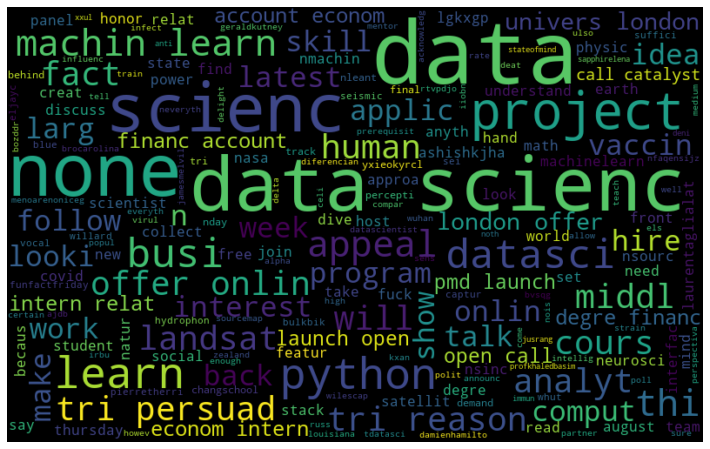

In [27]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


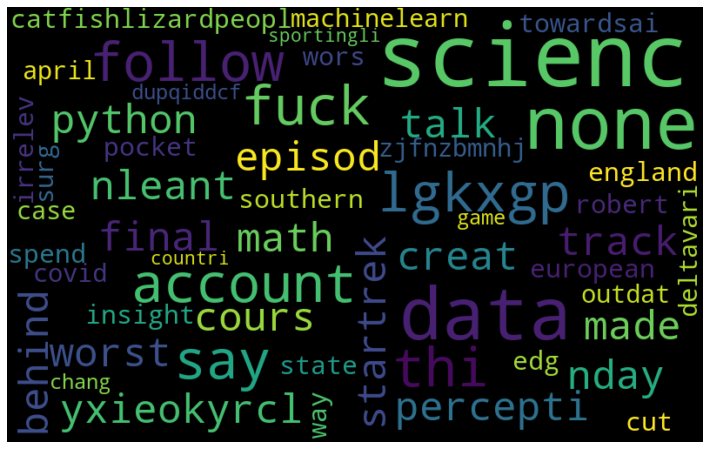

In [38]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['sentiment']=='negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


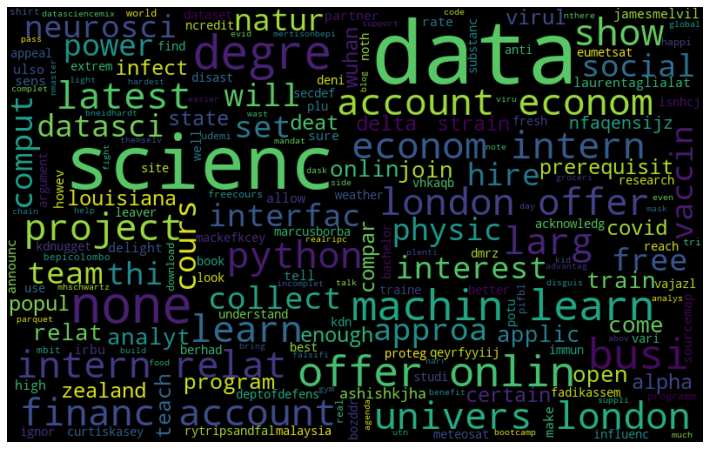

In [36]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['sentiment']=='positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

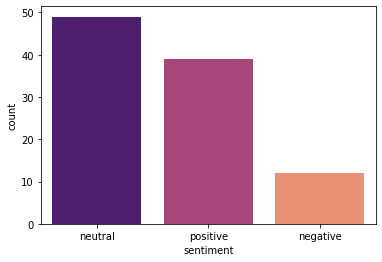

In [102]:
sns.countplot(df['sentiment'],palette="magma")

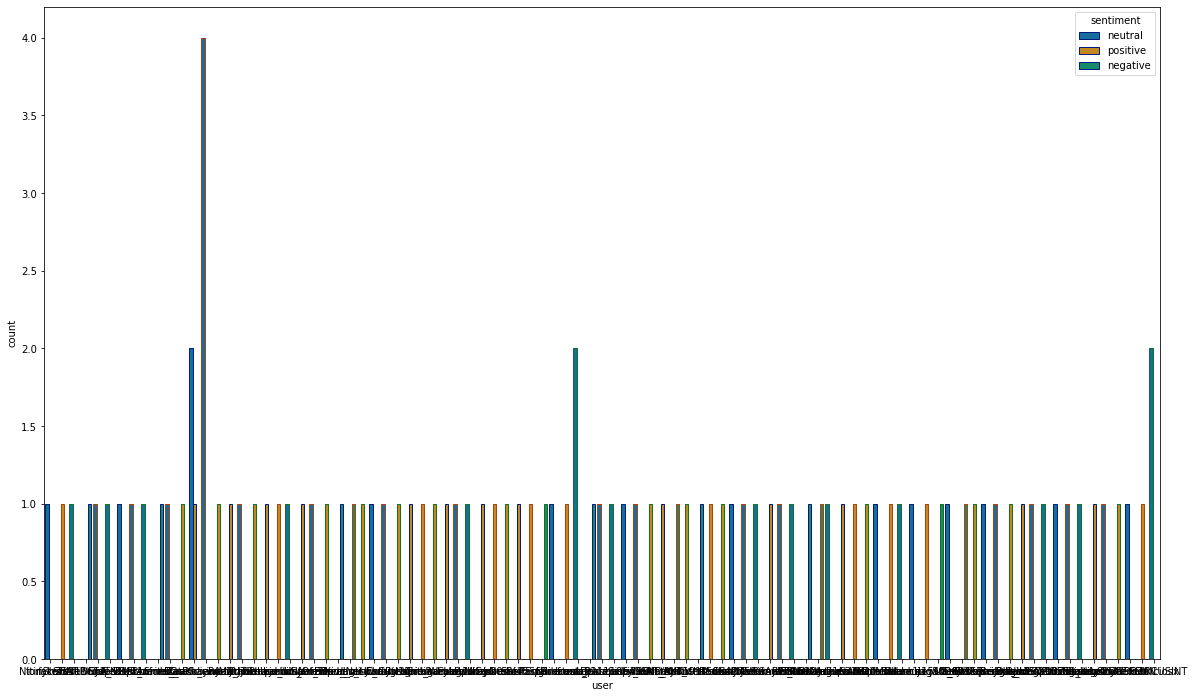

In [108]:
import matplotlib.pyplot as plt
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='user', hue='sentiment', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 3));

In [37]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [39]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_text'][df['sentiment']=='negative'])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_text'][df['sentiment']=='positive'])

In [40]:
ht_positive[:5]

[[], [], [], ['startrek', 'catfishlizardpeopl'], []]

In [41]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [42]:
ht_positive[:5]

['startrek', 'catfishlizardpeopl', 'towardsai', 'machinelearn', 'covid']

In [43]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,startrek,1
1,catfishlizardpeopl,1
2,towardsai,1
3,machinelearn,1
4,covid,1


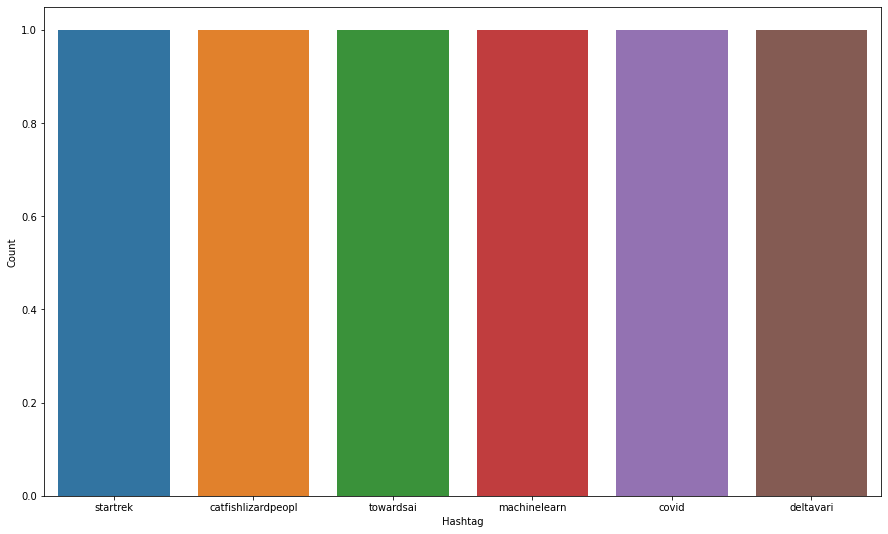

In [45]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=8)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [46]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,analyt,1
1,datasci,2
2,kdn,1
3,eumetsat,1
4,meteosat,1


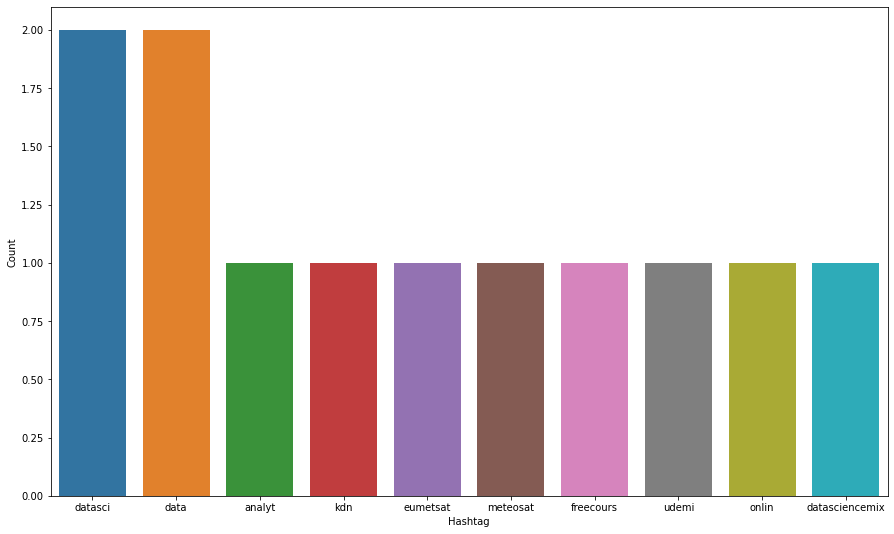

In [47]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [75]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text'])

In [76]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

# Data Modeling

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['sentiment'], random_state=42, test_size=0.25)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [79]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [81]:
accuracy_score(y_test,pred)

0.4

In [84]:
pred_prob[0][1] >= 0.3

True